In [1]:
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

### reading train and validation sets

In [25]:
def get_norm_pneu_dir(base_dir):
    return os.path.join(base_dir, 'NORMAL'), os.path.join(base_dir, 'PNEUMONIA')

def get_image_filenames(root_dir):
    files = []
    for file in os.listdir(root_dir):
        if file.endswith('.jpeg'):
            files.append(os.path.join(root_dir, file))
    return files

def split_bacteria_virus(files):
    bacteria_files = []
    virus_files = []
    for file in files:
        if "bacteria" in file:
            bacteria_files.append(file)
        elif "virus" in file:
            virus_files.append(file)
    return bacteria_files, virus_files

def file_to_array(file):
    return np.asarray(Image.open(file))

def load_dataset(norm_files, pneu_bact_files, pneu_virus_files):
    dataset = {'image_file': [], 'is_bact': [], 'is_virus': []}
    for file in norm_files:
        dataset['image_file'].append(file)
        dataset['is_bact'].append(0)
        dataset['is_virus'].append(0)
    for file in pneu_bact_files:
        dataset['image_file'].append(file)
        dataset['is_bact'].append(1)
        dataset['is_virus'].append(0)
    for file in pneu_virus_files:
        dataset['image_file'].append(file)
        dataset['is_bact'].append(0)
        dataset['is_virus'].append(1)
    dataset = pd.DataFrame(dataset)
    dataset['is_pneu'] =  np.amax([dataset['is_bact'], dataset['is_virus']],axis=0)
    return dataset
    
def read_dataset(root_dir):
    # get sub directories
    norm_dir, pneu_dir = get_norm_pneu_dir(root_dir)
    # get image file names
    norm_files = get_image_filenames(norm_dir)
    pneu_files = get_image_filenames(pneu_dir)
    # split viral and bacterial sets
    pneu_bact_files, pneu_virus_files = split_bacteria_virus(pneu_files)
    dataset = load_dataset(norm_files, pneu_bact_files, pneu_virus_files)
    return dataset


In [26]:
data_dir = os.path.join(os.curdir, 'chest_xray')
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
train_dataset = read_dataset(train_dir)
# validation set is way to small. appending to training set
train_dataset.append(read_dataset(val_dir))

,image_file,is_bact,is_virus,is_pneu
0,./chest_xray/train/NORMAL/NORMAL2-IM-0927-0001...,0,0,0
1,./chest_xray/train/NORMAL/NORMAL2-IM-1056-0001...,0,0,0
2,./chest_xray/train/NORMAL/IM-0427-0001.jpeg,0,0,0
3,./chest_xray/train/NORMAL/NORMAL2-IM-1260-0001...,0,0,0
4,./chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg,0,0,0
...,...,...,...,...
11,./chest_xray/val/PNEUMONIA/person1946_bacteria...,1,0,1
12,./chest_xray/val/PNEUMONIA/person1947_bacteria...,1,0,1
13,./chest_xray/val/PNEUMONIA/person1946_bacteria...,1,0,1
14,./chest_xray/val/PNEUMONIA/person1949_bacteria...,1,0,1


### Exploring the dataset

           is_bact     is_virus      is_pneu
count  5216.000000  5216.000000  5216.000000
mean      0.485046     0.257860     0.742906
std       0.499824     0.437499     0.437073
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     1.000000
75%       1.000000     1.000000     1.000000
max       1.000000     1.000000     1.000000
                                          image_file  is_bact  is_virus  \
0  ./chest_xray/train/NORMAL/NORMAL2-IM-0927-0001...        0         0   
1  ./chest_xray/train/NORMAL/NORMAL2-IM-1056-0001...        0         0   
2        ./chest_xray/train/NORMAL/IM-0427-0001.jpeg        0         0   
3  ./chest_xray/train/NORMAL/NORMAL2-IM-1260-0001...        0         0   
4   ./chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg        0         0   

   is_pneu  
0        0  
1        0  
2        0  
3        0  
4        0  


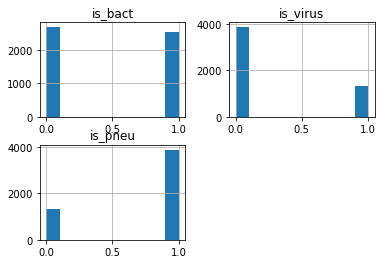

In [28]:
print(train_dataset.describe())
print(train_dataset.head())
train_dataset.hist()
plt.show()

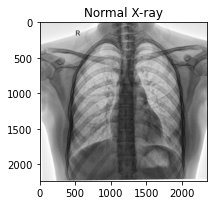

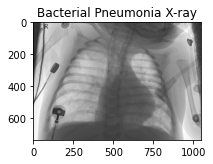

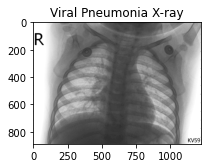

In [48]:
not_bac = train_dataset[train_dataset['is_bact']==0]
fig_size = (3,3)

fig = plt.figure(figsize=(3,3))
plt.imshow(file_to_array(not_bac[not_bac['is_virus']==0]['image_file'].iloc[0]),cmap='binary')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Normal X-ray")
plt.savefig("normal.png", facecolor=(1.0, 1.0,1.0))
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(file_to_array(train_dataset[train_dataset['is_bact']==1]['image_file'].iloc[0]),cmap='binary')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Bacterial Pneumonia X-ray")
plt.savefig("bacteria.png", facecolor=(1.0, 1.0,1.0))
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(file_to_array(train_dataset[train_dataset['is_virus']==1]['image_file'].iloc[0]),cmap='binary')
ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Viral Pneumonia X-ray")
plt.savefig("virus.png", facecolor=(1.0, 1.0,1.0))
plt.show()